In [2]:
import numpy as np

N = 1000
theta = 2.0
eps = np.random.randn(N)
x = theta + eps

# Let's consider an optimization problem 
# argmin_theta E[x^2] when prob_theta(x) = N(theta, 1). 
# Random variable x is parameterized by theta
# We know that the obvious answer is theta = 0.
# Anyway, let's compute gradient
grad1 = lambda x: np.sum(np.square(x)*(x-theta)) / x.size # direct derivative
grad2 = lambda eps: np.sum(2*(theta + eps)) / x.size # reparameterization trick. Here, x = theta(differentiable) + epilson (random variable)

print(grad1(x)) # treat x as is (random variable)
print(grad2(eps)) # treat x as theta(deterministic) + (random variable)

3.9386957549565724
3.943147341535722


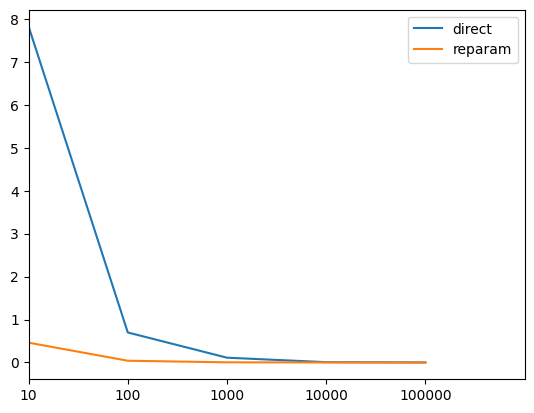

In [3]:
Ns = [10, 100, 1000, 10000, 100000]
reps = 100

means1 = np.zeros(len(Ns))
vars1 = np.zeros(len(Ns))
means2 = np.zeros(len(Ns))
vars2 = np.zeros(len(Ns))

est1 = np.zeros(reps)
est2 = np.zeros(reps)
for i, N in enumerate(Ns):
    for r in range(reps):
        x = np.random.randn(N) + theta
        est1[r] = grad1(x)
        eps = np.random.randn(N)
        est2[r] = grad2(eps)
    means1[i] = np.mean(est1)
    means2[i] = np.mean(est2)
    vars1[i] = np.var(est1)
    vars2[i] = np.var(est2)
    
import matplotlib.pyplot as plt
xi = list(range(len(Ns)))
plt.xlim(0, len(Ns))
plt.xticks(xi, Ns)
plt.plot(xi, vars1)
plt.plot(xi, vars2)
plt.legend(['direct', 'reparam'])
